In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,log_loss
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('iris.csv')
X = data.drop(columns=['class'])
y = data['class']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
clf = RandomForestClassifier(n_estimators=100, random_state=12)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred_prob = clf.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
entropy = log_loss(y_test, y_pred_prob)

In [ ]:
accuracy,prec,recall,entropy

(1.0, 1.0, 1.0, 0.026806619424580895)

In [21]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_path = "classification_report.csv"
report_df.to_csv(report_path, index=False)

c:\Users\Jomon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


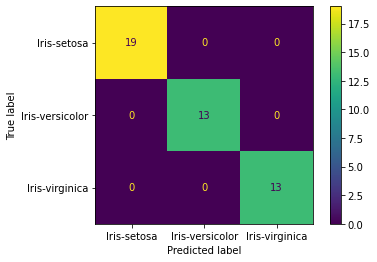

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.savefig('confusion_matrix.png')

In [23]:
mlflow.set_experiment("Knowhub")
with mlflow.start_run() as run:
    mlflow.log_params({
        'n_estimators': 100,
        'random_state': 12
    })
    
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_metric('Precision', prec)
    mlflow.log_metric('Recall', recall)
    mlflow.log_metric('entropy', entropy)

    mlflow.log_artifact(report_path, artifact_path="reports")
    mlflow.log_artifact("confusion_matrix.png", artifact_path="plots")
    mlflow.sklearn.log_model(clf, "model")


In [24]:
import mlflow
logged_model = 'runs:/1da6f78333064133a2a58b3b771a9933/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### Fetching an MLflow Model from the Model Registry

In [25]:
import mlflow.pyfunc

model_name = "iris-classifier"
model_version = 1

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{model_version}"
)

y_pred = model.predict(X_test)
print(y_pred)



['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


#### Transitioning an MLflow Model’s Stage

In [26]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="iris-classifier",
    version=1,
    stage="Production"
)

<ModelVersion: aliases=[], creation_timestamp=1696575196238, current_stage='Production', description='', last_updated_timestamp=1696575257242, name='iris-classifier', run_id='1da6f78333064133a2a58b3b771a9933', run_link='', source='file:///d:/MLflow/mlruns/874913766582712086/1da6f78333064133a2a58b3b771a9933/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [27]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Production'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


In [28]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Production'

model = mlflow.sklearn.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict([[1.7,1.2,5.7,4.1]])
print(y_pred)

['Iris-virginica']


c:\Users\Jomon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Serving an MLflow Model from Model Registry

mlflow models serve --model-uri models:/iris-classifier/Production -p 1234 --no-conda``

### Do Prediction

In [29]:
import requests

inference_request = {
        "dataframe_records": [[6.7,3.3,5.7,2.1]]
}

endpoint = "http://localhost:1234/invocations"

response = requests.post(endpoint, json=inference_request)

print(response.text)

{"predictions": ["Iris-virginica"]}


### Batch Prediction

In [30]:
import requests
lst = X_test.values.tolist()
inference_request = {
        "dataframe_records": lst
}
endpoint = "http://localhost:1234/invocations"
response = requests.post(endpoint, json=inference_request)
print(response)

<Response [200]>


In [31]:
print(response.text)

{"predictions": ["Iris-versicolor", "Iris-setosa", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-setosa", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-virginica", "Iris-setosa", "Iris-virginica", "Iris-setosa", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-virginica", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-versicolor", "Iris-setosa", "Iris-setosa", "Iris-virginica", "Iris-versicolor", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-setosa", "Iris-setosa"]}
